In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
df = pd.read_csv("dataset.csv")
df_org = pd.read_csv("dataset.csv")

In [166]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [167]:
df.shape

(197428, 14)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [169]:
df.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2.978706,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
std,1.524867,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


# We have the time at which the order was created and the time when the order was delievered . From this we can calculated the total time taken for the order to be delievered .That would be our target for the training.So here we are calculating the total delievery time for each order 

In [170]:
#As we see in info created_at is of object datatype so is actual_delievery_time so we will convert them to datetime first

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

#Actual delievery time (Target for our training)
df['Total_time_taken'] = df['actual_delivery_time']-df['created_at']

#Now we can convert the total_time_taken in mins 
df['Total_time_taken_mins'] = pd.to_timedelta(df['Total_time_taken'])/pd.Timedelta('60s')

In [171]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,Total_time_taken,Total_time_taken_mins
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,0 days 01:02:59,62.983333
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,0 days 01:07:04,67.066667
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,0 days 00:29:41,29.683333
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,0 days 00:51:15,51.250000
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,0 days 00:39:50,39.833333


In [172]:
#We can extract the hour and day from the order date to better understand if there is any pattern in the data 

df['Day_of_order'] = df['created_at'].dt.dayofweek
df['Hour_of_order'] = df['created_at'].dt.hour

In [173]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,Total_time_taken,Total_time_taken_mins,Day_of_order,Hour_of_order
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,0 days 01:02:59,62.983333,4,22
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,0 days 01:07:04,67.066667,1,21
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,0 days 00:29:41,29.683333,3,20
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,0 days 00:51:15,51.250000,1,21
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,0 days 00:39:50,39.833333,6,2


In [174]:
#We can drop the features now which are not required. As we have extracted the details needed from created_at,Total_time_taken we can drop these fioelds now
df.drop(['Total_time_taken','created_at','actual_delivery_time'],axis=1,inplace=True)

In [175]:
#Check for any null data 
df.isnull().sum()/df.shape[0]*100

market_id                   0.499929
store_id                    0.000000
store_primary_category      2.411006
order_protocol              0.503981
total_items                 0.000000
subtotal                    0.000000
num_distinct_items          0.000000
min_item_price              0.000000
max_item_price              0.000000
total_onshift_partners      8.236927
total_busy_partners         8.236927
total_outstanding_orders    8.236927
Total_time_taken_mins       0.003546
Day_of_order                0.000000
Hour_of_order               0.000000
dtype: float64

In [176]:
df.dropna(inplace=True)

In [177]:
df.shape

(176248, 15)

<AxesSubplot:>

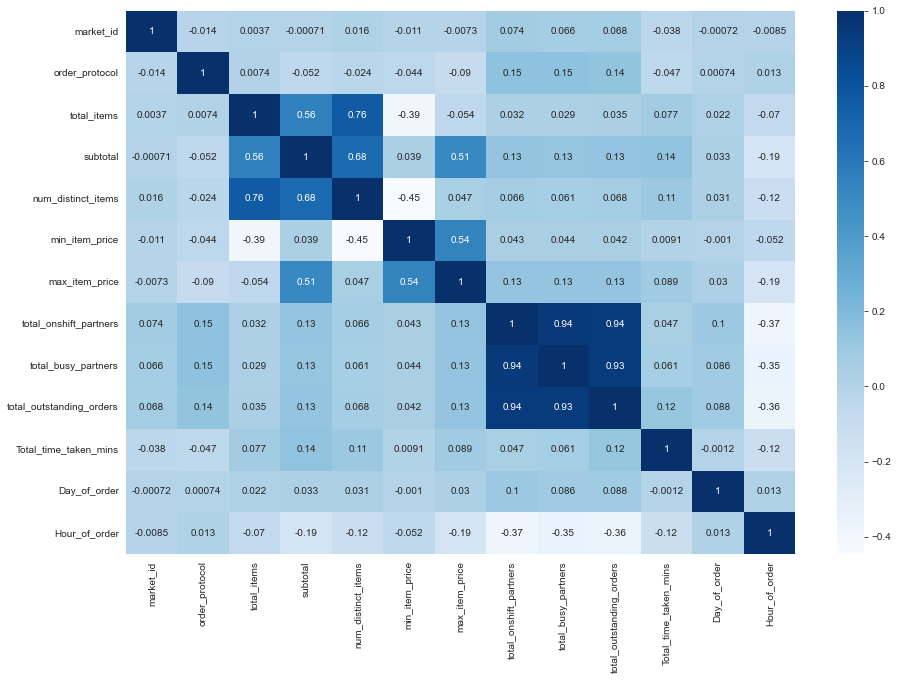

In [178]:
#Now lets check the corelation of all the features using heat map
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [131]:
#Lets take the avg of min and max price and create a new feature
# df['Avg_Price'] = (df['min_item_price'] + df['max_item_price'])/2

#We will drop total busy partners and total_onshift_partners as it has high corelation with total_onshift_partners
# and will not give much information while training inplace of that we will take % of partners who were who were available 
# df['partners_available(%)'] = ((df['total_onshift_partners']-df['total_busy_partners'])/df['total_onshift_partners'])*100

# df.drop(['min_item_price','max_item_price'],axis=1,inplace=True)

In [179]:
df.head()

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,Total_time_taken_mins,Day_of_order,Hour_of_order
0,1.0,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,4,22
1,2.0,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,1,21
8,2.0,f0ade77b43923b38237db569b016ba25,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,26.433333,0,0
14,1.0,ef1e491a766ce3127556063d49bc2f98,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,37.883333,3,3
15,1.0,ef1e491a766ce3127556063d49bc2f98,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,49.800000,1,2


In [180]:
df['store_primary_category'].unique

<bound method Series.unique of 0         american
1          mexican
8           indian
14         italian
15         italian
            ...   
197423        fast
197424        fast
197425        fast
197426    sandwich
197427    sandwich
Name: store_primary_category, Length: 176248, dtype: object>

In [181]:
df['store_primary_category']=df['store_primary_category'].astype('category').cat.codes
df['store_id']=df['store_id'].astype('category').cat.codes

In [182]:
df['store_primary_category'].unique

<bound method Series.unique of 0          4
1         46
8         36
14        38
15        38
          ..
197423    28
197424    28
197425    28
197426    58
197427    58
Name: store_primary_category, Length: 176248, dtype: int8>

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176248 entries, 0 to 197427
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 176248 non-null  float64
 1   store_id                  176248 non-null  int16  
 2   store_primary_category    176248 non-null  int8   
 3   order_protocol            176248 non-null  float64
 4   total_items               176248 non-null  int64  
 5   subtotal                  176248 non-null  int64  
 6   num_distinct_items        176248 non-null  int64  
 7   min_item_price            176248 non-null  int64  
 8   max_item_price            176248 non-null  int64  
 9   total_onshift_partners    176248 non-null  float64
 10  total_busy_partners       176248 non-null  float64
 11  total_outstanding_orders  176248 non-null  float64
 12  Total_time_taken_mins     176248 non-null  float64
 13  Day_of_order              176248 non-null  i

In [184]:
df.isnull().sum()

market_id                   0
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
Total_time_taken_mins       0
Day_of_order                0
Hour_of_order               0
dtype: int64

# Now as we have removed the unnecesarry columns,added new features and have removed categorical features with numerical ordinance values lets proceed with scaling the data and visualising it 


<AxesSubplot:xlabel='subtotal', ylabel='Total_time_taken_mins'>

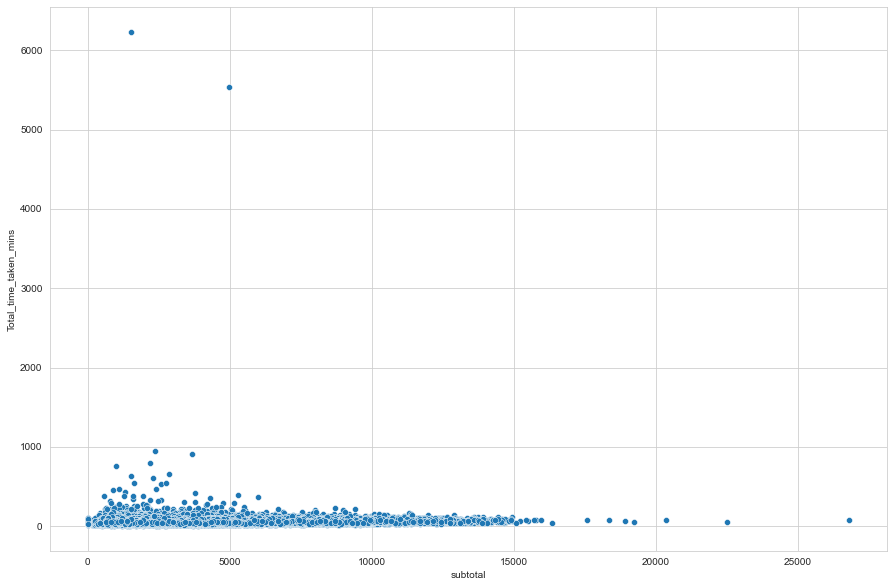

In [185]:
#Lets check the effect of subtotal quantity on the tital_time_taken
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
sns.scatterplot(y='Total_time_taken_mins',x='subtotal',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_time_taken_mins'>

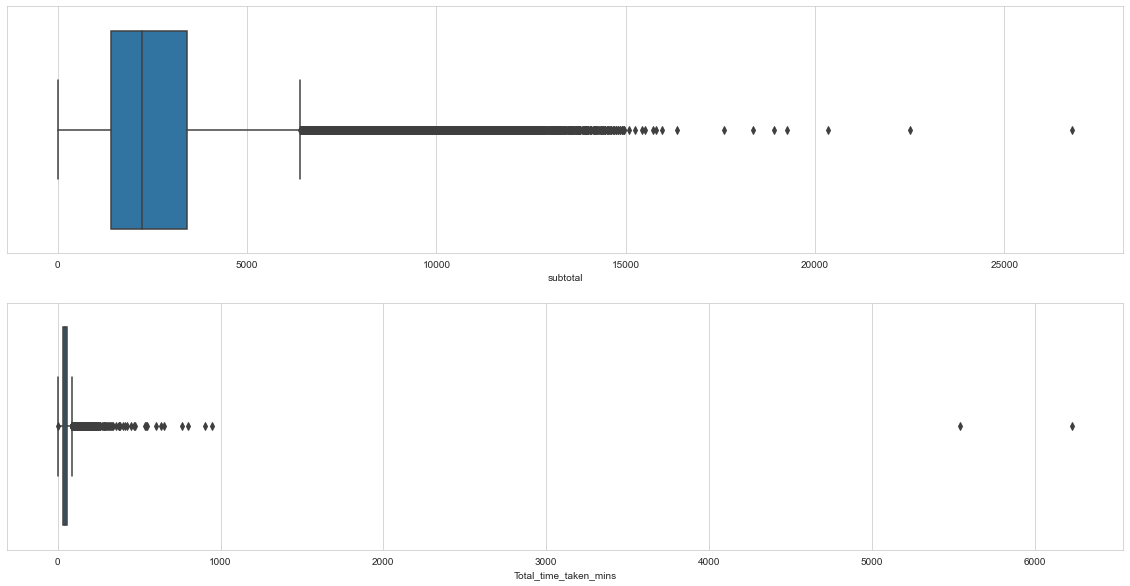

In [186]:
#We can see there are few outliers in the data so lets remove the outliers in the data and again analyse it 
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.boxplot(df['subtotal'])
plt.subplot(2,1,2)
sns.boxplot(df['Total_time_taken_mins'])

We can clearly see the outliers in the above boxplots

In [187]:
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
model1=LocalOutlierFactor()
#model1.fit(df)
df['lof_anomaly_score']=model1.fit_predict(df)

In [188]:
print("number of outliers : ",(len(df.loc[(df['lof_anomaly_score'] == -1)])))
df=df.loc[(df['lof_anomaly_score'] == 1)]

number of outliers :  981


In [189]:
df.drop(['lof_anomaly_score'],axis=1,inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_time_taken_mins'>

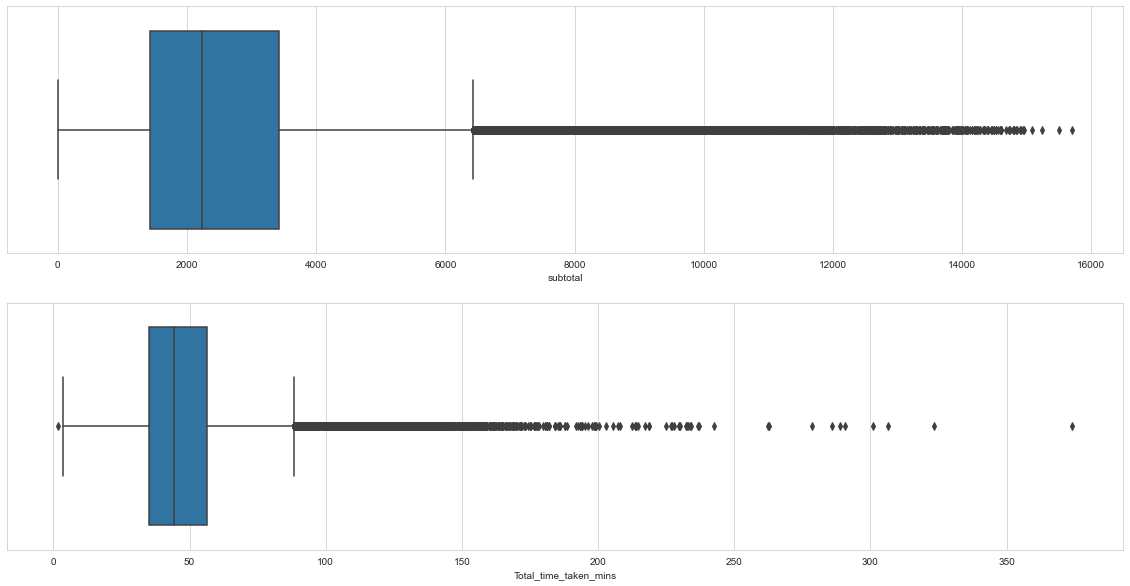

In [190]:
#After removing the outliers 
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.boxplot(df['subtotal'])
plt.subplot(2,1,2)
sns.boxplot(df['Total_time_taken_mins'])

<AxesSubplot:xlabel='subtotal', ylabel='Total_time_taken_mins'>

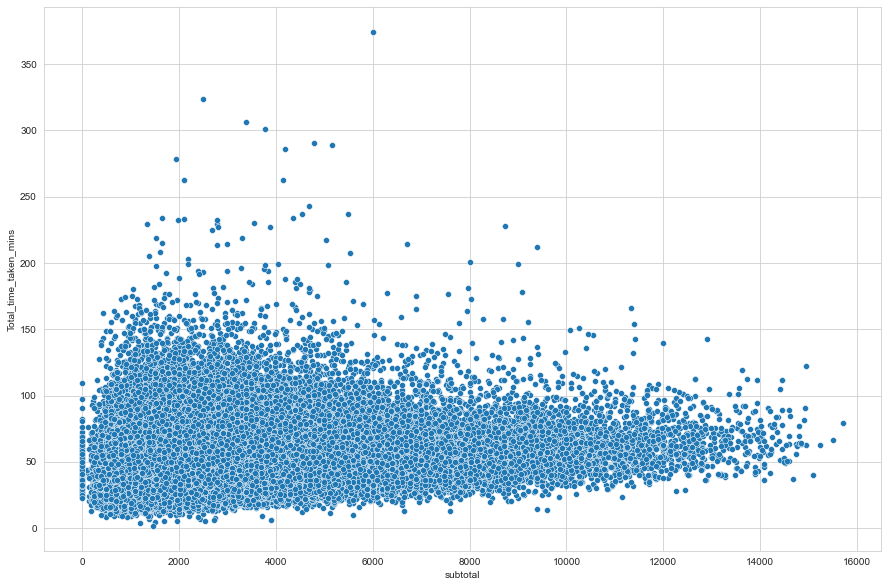

In [191]:
#Lets check the effect of subtotal quantity on the tital_time_taken
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
sns.scatterplot(y='Total_time_taken_mins',x='subtotal',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Day_of_order', ylabel='count'>

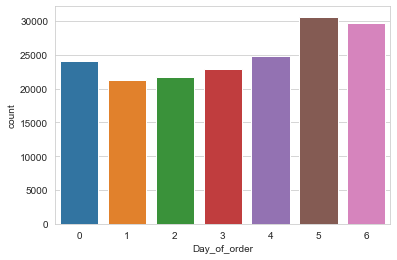

In [192]:
#Now lets analyse the data based on the time taken to deliever the order on basis of the day
# when the order was created and the time when the order was createdplt.figure(figsize=(12,8))
sns.countplot(df['Day_of_order'])

We can see most of the orders are on Saturday from the above countplot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_busy_partners', ylabel='Total_time_taken_mins'>

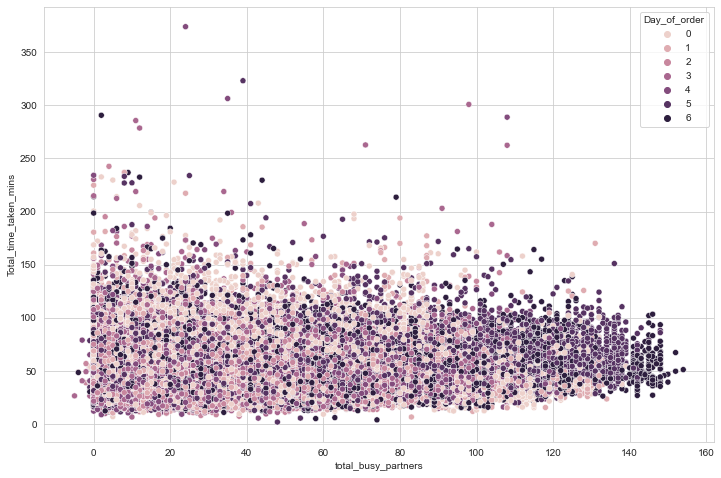

In [193]:
plt.figure(figsize=(12,8))
sns.scatterplot(df['total_busy_partners'],df['Total_time_taken_mins'],hue=df['Day_of_order'],cmap='Blues')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hour_of_order', ylabel='count'>

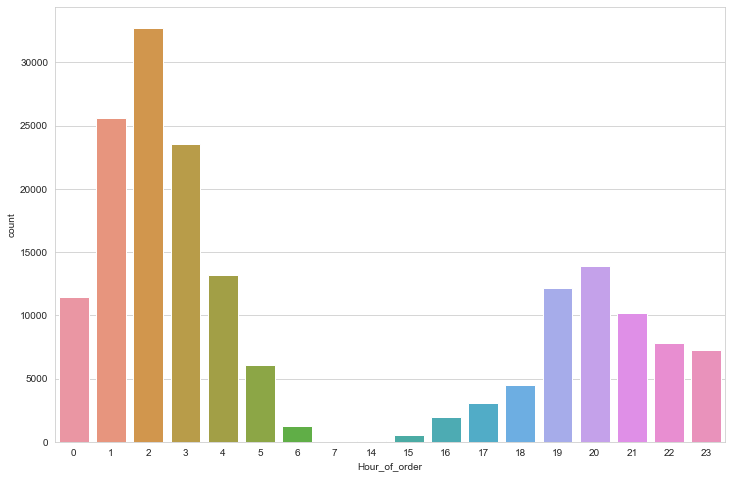

In [194]:
plt.figure(figsize=(12,8))
sns.countplot(df['Hour_of_order'])

# Lets now split the data to train,test and val sets and further scale the data before training the model

In [195]:
#Lets Split the data first
X = df.drop(['Total_time_taken_mins'],axis=1)
Y = df['Total_time_taken_mins']

from sklearn.model_selection import train_test_split
x,x_test,y,y_test = train_test_split(X,Y,test_size=0.15,random_state=42)
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.15,random_state=42)

In [196]:
print('x_train shape :',x_train.shape)
print('x_val shape :',x_val.shape)
print('x_test shape :',x_test.shape)
print("----------------------------")
print('y_train shape :',y_train.shape)
print('y_val shape :',y_val.shape)
print('y_test shape :',y_test.shape)

x_train shape : (126629, 14)
x_val shape : (22347, 14)
x_test shape : (26291, 14)
----------------------------
y_train shape : (126629,)
y_val shape : (22347,)
y_test shape : (26291,)


In [222]:
#First we will scale the data using MinMaxScaler as the variance of data would be diff which will impact the training process
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_sc = scaler.fit_transform(x_train)

In [231]:
#Will scale the test and val set using the same patraemters which we got scaling the train set
x_test_sc = scaler.transform(x_test)
x_val_sc = scaler.transform(x_val)

In [232]:
#Will create a neural network to estimate the time 

In [233]:
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
adam=Adam(learning_rate=0.01)

In [234]:
input1 = Input(shape=(x_train_sc.shape[1],))
hidden1 = Dense(512, activation='relu')(input1)
hidden4 = Dense(256, activation='relu')(hidden1)
hidden5 = Dense(128, activation='relu')(hidden4)
Output = Dense(1, activation='linear')(hidden5)

In [235]:
model_func_adam = Model(inputs=input1, outputs=Output)

In [236]:
model_func_adam.compile(loss = 'mse',optimizer=adam,metrics=['mse','mae'])

In [237]:
history = model_func_adam.fit(x_train_sc,y_train,epochs=20,batch_size=1024,verbose=1,validation_data=(x_val_sc,y_val))

Epoch 1/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 628.0267 - mae: 18.3025 - mse: 628.0267 - val_loss: 261.9637 - val_mae: 12.1529 - val_mse: 261.9637
Epoch 2/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 270.9762 - mae: 12.0109 - mse: 270.9762 - val_loss: 257.5921 - val_mae: 11.5967 - val_mse: 257.5921
Epoch 3/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 263.4994 - mae: 11.8225 - mse: 263.4994 - val_loss: 252.5584 - val_mae: 11.6612 - val_mse: 252.5584
Epoch 4/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 261.8531 - mae: 11.7712 - mse: 261.8531 - val_loss: 253.2787 - val_mae: 11.4662 - val_mse: 253.2787
Epoch 5/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 261.5410 - mae: 11.7418 - mse: 261.5410 - val_loss: 249.2154 - val_mae: 11.6700 - val_mse: 249.2154
Epoch 6/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 258.2099 - mae: 11.7116 - mse: 258.2099 - val_loss: 248.4020 - val_mae: 11.6952 - val_mse: 248.4020
Epoch 7/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 

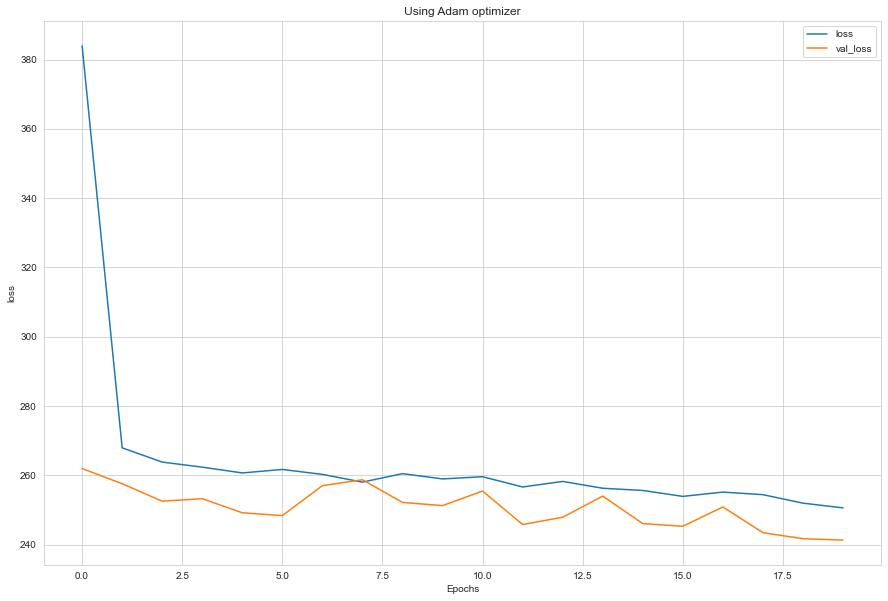

In [238]:
#With Rmsprop as optimizer
def plot_history(history,key):
    plt.figure(figsize=(15,10))
    plt.plot(history.history[key])
    plt.plot(history.history['val_'+key])
    plt.xlabel("Epochs")
    plt.ylabel(key)
    plt.legend([key,'val_'+key])
    plt.title("Using Adam optimizer")

    plt.show()
#plot the history
plot_history(history,'loss')

In [93]:
# model_func_rmsprop = Model(inputs=input1, outputs=Output)

In [94]:
# model_func_rmsprop.compile(loss = 'mse',optimizer='rmsprop',metrics=['mse','mae'])

In [95]:
# history1 = model_func_rmsprop.fit(x_train_sc,y_train,epochs=20,batch_size=1024,verbose=1,validation_data=(x_val_sc,y_val))

Epoch 1/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 255.8377 - mae: 11.8709 - mse: 255.8377 - val_loss: 248.8486 - val_mae: 11.5273 - val_mse: 248.8486
Epoch 2/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 255.5028 - mae: 11.8108 - mse: 255.5028 - val_loss: 246.2932 - val_mae: 11.5762 - val_mse: 246.2932
Epoch 3/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 256.9588 - mae: 11.8469 - mse: 256.9588 - val_loss: 246.9816 - val_mae: 11.8747 - val_mse: 246.9816
Epoch 4/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 254.8422 - mae: 11.8006 - mse: 254.8422 - val_loss: 250.6025 - val_mae: 12.1047 - val_mse: 250.6025
Epoch 5/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 255.0903 - mae: 11.8315 - mse: 255.0903 - val_loss: 252.8671 - val_mae: 12.1732 - val_mse: 252.8671
Epoch 6/20
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 256.2548 - mae: 11.8420 - mse: 256.2548 - val_loss: 251.5018 - val_mae: 12.1646 - val_mse: 251.5018
Epoch 7/20
124/124 ━━━━━━━━━━━━━━━

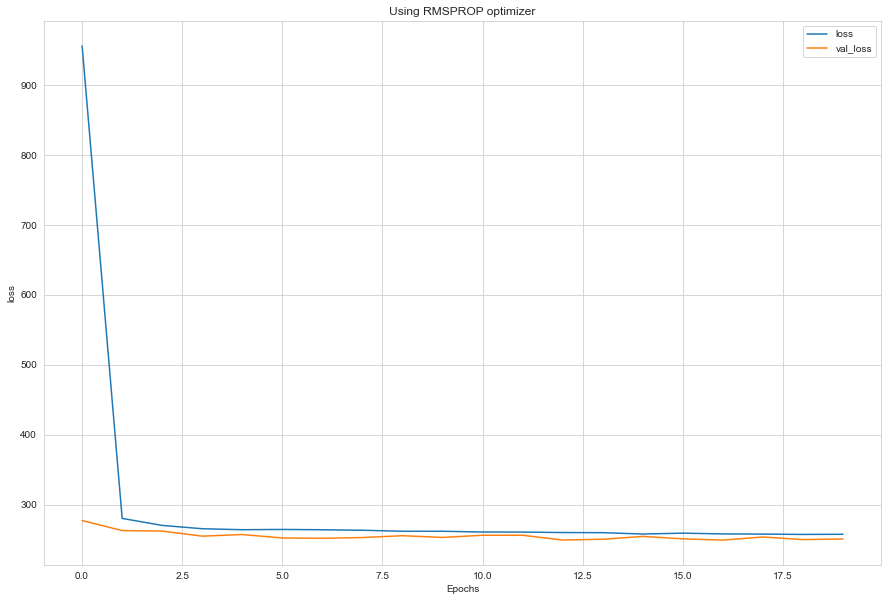

In [100]:
# #With Adam as optimizer with lr = 0.01
# def plot_history(history1,key):
#     plt.figure(figsize=(15,10))
#     plt.plot(history1.history[key])
#     plt.plot(history1.history['val_'+key])
#     plt.xlabel("Epochs")
#     plt.ylabel(key)
#     plt.legend([key,'val_'+key])
#     plt.title("Using RMSPROP optimizer")
#     plt.show()
# #plot the history
# plot_history(history,'loss')

In [97]:
model=Sequential()
model.add(Dense(14,kernel_initializer='normal',activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='linear'))

In [98]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [99]:
from tensorflow.keras.optimizers import Adam
adam=Adam(learning_rate=0.01)
model.compile(loss='mse',optimizer=adam,metrics=['mse','mae'])
history_seq=model.fit(x_train_sc,y_train,epochs=30,batch_size=512,verbose=1,validation_data=(x_val_sc,y_val))

Epoch 1/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 937.9976 - mae: 22.9672 - mse: 937.9976 - val_loss: 293.5488 - val_mae: 13.3453 - val_mse: 293.5488
Epoch 2/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 295.2152 - mae: 12.7659 - mse: 295.2152 - val_loss: 265.2525 - val_mae: 12.2664 - val_mse: 265.2525
Epoch 3/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 272.3544 - mae: 12.2559 - mse: 272.3544 - val_loss: 270.6645 - val_mae: 11.8939 - val_mse: 270.6645
Epoch 4/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 271.0772 - mae: 12.1972 - mse: 271.0772 - val_loss: 263.6587 - val_mae: 12.5008 - val_mse: 263.6587
Epoch 5/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 269.3090 - mae: 12.1727 - mse: 269.3090 - val_loss: 260.6941 - val_mae: 12.3283 - val_mse: 260.6941
Epoch 6/30
248/248 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 269.7939 - mae: 12.2085 - mse: 269.7939 - val_loss: 276.1563 - val_mae: 12.9698 - val_mse: 276.1563
Epoch 7/30
248/248 ━━━━━━━━━━━━━━━

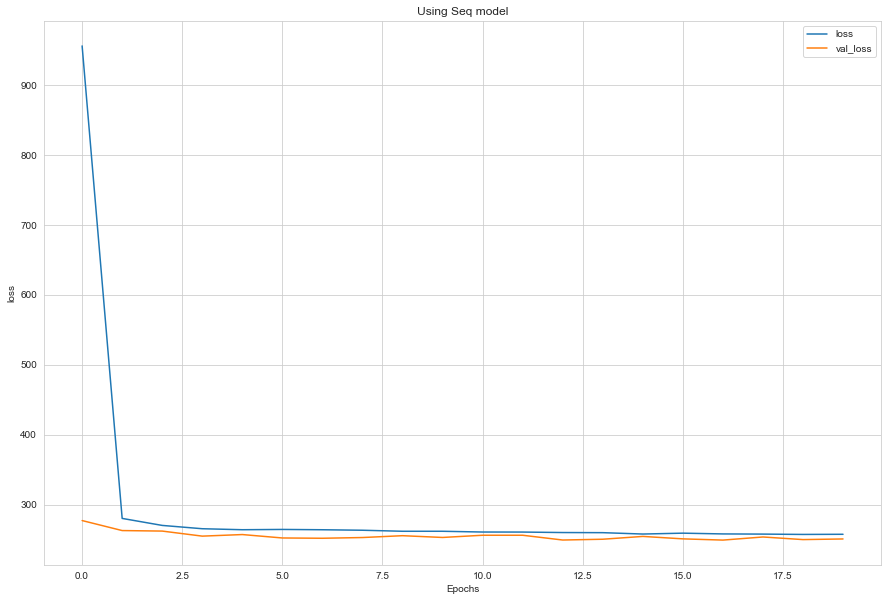

In [101]:
#With Adam as optimizer with lr = 0.01
def plot_history(history_seq,key):
    plt.figure(figsize=(15,10))
    plt.plot(history_seq.history[key])
    plt.plot(history_seq.history['val_'+key])
    plt.xlabel("Epochs")
    plt.ylabel(key)
    plt.legend([key,'val_'+key])
    plt.title("Using Seq model")
    plt.show()
#plot the history
plot_history(history,'loss')

In [239]:
#We will use Adam model to predict as it looks more stable with better results
pred = model_func_adam.predict(x_test_sc)

822/822 ━━━━━━━━━━━━━━━━━━━━ 1s 746us/step


In [240]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2_score(y_test, pred)

0.2587674504436771

In [241]:
mse = mean_squared_error(y_test, pred)
rmse = mse**.5
print("mse : ",mse)
print("rmse : ",rmse)
print("errors for neural net")
mae = mean_absolute_error(y_test, pred)
print("mae : ",mae)

mse :  248.94918364382622
rmse :  15.778123578037606
errors for neural net
mae :  11.389759448904865


In [248]:
from sklearn.metrics import mean_absolute_percentage_error
print("mape:",mean_absolute_percentage_error(y_test, pred))

mape: 0.2583992643476145
